# **Import dataset**

In [0]:
#import the pandas library.
#we need to handle with arrays. So, we import numpy library as well.
import pandas as pd
import numpy as np

train = pd.read_csv('https://raw.githubusercontent.com/gurusabarish/Titanic-prediction/master/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/gurusabarish/Titanic-prediction/master/test.csv')

# Analize the dataset

Train data

In [2]:
#Print the first few rows of train dataset.
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
# we dont use name and Ticket columns. So, we can drop those columns.
train.drop(['Name', 'Ticket'],axis=1, inplace=True)

In [4]:
#find the number of rows and columns
train.shape

(891, 10)

In [5]:
#We can find the mean,min and max term of columns with describe function.
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#print the columns with his datatype and non-null(filled) counts.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


Test data


In [0]:
# We should few columns in test data as well as train dta
test.drop(['Name', 'Ticket'],axis=1, inplace=True)
test.drop(['Cabin'], axis=1, inplace=True)

# Visualization

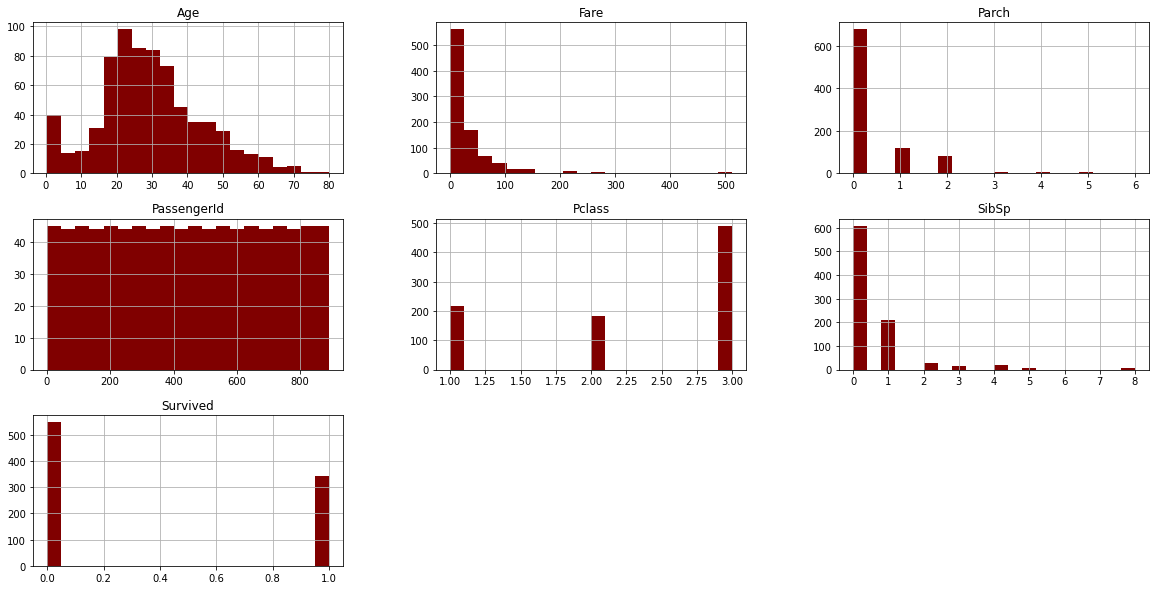

In [8]:
#import libraries
# we will find "how many peoples are have the same value in respective column?"

import matplotlib.pyplot as plt
train.hist(figsize=(20,10), color='maroon', bins=20)
plt.show()

# Handle the missing data

In [9]:
# Count of missing data in each columns
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Find the percentage of missing data with respective columns.
columns = train.columns
for i in columns:
    percentage = (train[i].isnull().sum()/891)*100
    print(i,"\t %.2f" %percentage)

PassengerId 	 0.00
Survived 	 0.00
Pclass 	 0.00
Sex 	 0.00
Age 	 19.87
SibSp 	 0.00
Parch 	 0.00
Fare 	 0.00
Cabin 	 77.10
Embarked 	 0.22


In [0]:
#Cabin has almost 80% missing data.So, we are drop the column.
train.drop(['Cabin'], axis=1, inplace=True)

In [0]:
#Embrked column has only few NAN value.So, drop the row which is contain the missing data.
train.dropna(subset=['Embarked'], inplace=True)

In [0]:
# Fill the NAN values with mean in Age column
train['Age'].fillna(train['Age'].mean(), inplace=True)

In [14]:
# Check the columns are don't contain the NAN values.
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
dtype: bool

Test data

In [15]:
test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [0]:
test['Age'].fillna(train['Age'].mean(), inplace=True)
test['Fare'].fillna(train['Fare'].mean(), inplace=True)

In [17]:
test.isnull().any()

PassengerId    False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
dtype: bool

# Change data into numerical

Train data

In [0]:
# Import the function from sklearn library
from sklearn import preprocessing
label = preprocessing.LabelEncoder()

In [19]:
# Find out the columns which is have object data type and store the column names.
object_columns = []
for i in train.columns:
    if train[i].dtype==object:
        object_columns.append(i)
print(object_columns)

['Sex', 'Embarked']


In [0]:
# Convert the columns's object data to numerical data.
for i in object_columns:
    train[i] = label.fit_transform(train[i])

In [21]:
# Verify the dataset is contain only numerical values.
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.5 KB


Test data

In [22]:
test_object_columns = []
for i in test.columns:
    if test[i].dtype==object:
        test_object_columns.append(i)
print(test_object_columns)

['Sex', 'Embarked']


In [0]:
for i in test_object_columns:
    test[i] = label.fit_transform(test[i])

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


# Find the best algorithm

In [0]:
x=train.drop('Survived',axis=1)
y=train['Survived']

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier

In [0]:
cross_val_score(LogisticRegression(), x, y).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.7761759664825747

In [0]:
cross_val_score(SVC(), x, y).mean()

0.6400685583698343

In [0]:
cross_val_score(RandomForestClassifier(n_estimators=25), x, y).mean()

0.7930743350472926

In [0]:
cross_val_score(GaussianNB(), x, y).mean()

0.7896781565416112

# Train and test split

In [0]:
# Split the train dataset to build model.
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.30, random_state=10)

# Grid search

In [0]:
from sklearn.metrics import confusion_matrix,accuracy_score
def evaluate(model, x_test, y_test):
  prediction = model.predict(x_test)
  print(accuracy_score(y_test, prediction))

In [0]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [4,6,8,10,12],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [1, 3, 4, 5],
    'min_samples_split': [1, 2, 4, 5],
    'n_estimators': [100, 200, 300, 1000]
}# Create a based model
rf = RandomForestRegressor()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [0]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train)
best = grid_search.best_params_

Fitting 3 folds for each of 960 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed: 19.4min finished


In [0]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

# Random forest

In [0]:
model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, criterion='gini',
                      max_depth=6, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

predictions = model.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       169
           1       0.85      0.70      0.77        98

    accuracy                           0.85       267
   macro avg       0.85      0.82      0.83       267
weighted avg       0.85      0.85      0.84       267

[[157  12]
 [ 29  69]]
0.846441947565543


# Evaluation

In [0]:
ids = test['PassengerId']
survived=model.predict(test)
survived

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [0]:
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': survived })
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [0]:
output.to_csv('output.csv', index=False)